# **TRABAJO FINAL DATA SCIENCE II**

**Abstracto: Análisis Avanzado de Datos Agrícolas de Soja**

**Motivación**

El rendimiento de la soja es un factor clave en la industria agrícola y en la seguridad alimentaria global. Este análisis busca comprender cómo diversas características agronómicas, como la altura de la planta, el número de vainas, el contenido de proteínas y el índice de área foliar, afectan el rendimiento de la soja. Al identificar patrones y correlaciones dentro del dataset, se pueden optimizar las prácticas agrícolas para mejorar la producción y la calidad del cultivo.

**Audiencia**

Este análisis será de gran utilidad para agricultores, agrónomos, investigadores en biotecnología, empresas del sector agroindustrial y responsables de políticas agrícolas. Al obtener información basada en datos, estos grupos podrán tomar decisiones más informadas sobre estrategias de cultivo, selección de semillas y optimización de recursos para maximizar la productividad de la soja.

PREGUNTAS DE INTERES

¿Cuáles son los principales factores que influyen en el rendimiento de la soja
(SYUA - Seed Yield per Unit Area)?

¿Cómo afectan las variables climáticas y de suelo al rendimiento?

¿Existe una relación entre la altura de la planta y la cantidad de vainas?

¿Qué características predicen mejor un alto rendimiento?


## LECTURA DE DATOS

**Librerias necesarias para el analisis de datos**

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
!pip install scikit-learn

**LECTURA DEL DATASET**

In [2]:
url = 'https://raw.githubusercontent.com/FERPAOLONI/DATA-II/refs/heads/main/Advanced%20Soybean%20Agricultural%20Dataset.csv'

**Análisis inicial del dataset**

In [3]:
df = pd.read_csv(url)
df.head(10)

,Parameters,Random,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Content (PCO)
0,C1S1G5,R1,50.5,130.3,111.0,0.433,0.732,1.4,3.1,33.2,33.6,0.08,5567.4,1.86,0.82
1,C2S3G4,R1,44.5,132.0,80.0,0.334,0.674,7.1,2.2,38.5,34.4,0.09,2245.5,1.87,0.13
2,C2S1G6,R1,52.2,150.0,83.0,0.490,0.677,1.8,1.3,33.6,35.2,0.07,4326.7,2.04,0.15
3,C1S1G1,R1,50.5,140.8,66.0,0.163,0.745,1.1,3.0,33.5,52.3,0.09,6214.5,2.20,0.14
4,C1S2G6,R2,49.2,175.6,73.0,0.795,0.725,7.5,2.1,39.6,31.2,0.10,3897.8,1.88,0.60
5,C2S2G6,R2,52.0,136.0,62.0,0.265,0.633,4.3,1.2,33.5,44.4,0.07,3985.2,2.06,0.30
6,C1S1G6,R2,44.2,147.3,115.0,0.463,0.762,1.1,2.1,37.3,31.9,0.10,3029.3,1.60,0.48
7,C1S3G5,R1,52.0,158.3,205.0,0.531,0.677,1.2,3.2,33.3,32.6,0.07,6645.7,1.87,0.40
8,C2S2G4,R2,49.3,155.0,68.0,0.298,0.672,7.2,1.2,31.1,38.1,0.06,3104.6,1.80,0.18
9,C2S3G1,R1,45.8,151.0,87.0,0.323,0.717,1.9,2.5,37.6,37.5,0.03,4256.8,2.20,0.73


***VARIABLES***

**Parameters : Región**


**Random : Tipo de Suelo**


**Plant Height (PH) : Altura de la planta**

**Number of Pods (NP) : Número de vainas**


**Biological Weight (BW) : Peso biológico**


**Sugars (Su) : Azúcares**


**Relative Water Content in Leaves (RWCL) : Contenido relativo de agua en las hojas**


**ChlorophyllA663 : Clorofila A663**


**Chlorophyllb649 : Clorofila B649**


**Protein Percentage (PPE) : Porcentaje de proteína**


**Weight of 300 Seeds (W3S) : Peso de 300 semillas**


**Leaf Area Index (LAI) : Índice de área foliar**


**Seed Yield per Unit Area (SYUA) : Rendimiento de semillas por unidad de área**


**Number of Seeds per Pod (NSP) : Número de semillas por vaina**


**Protein Content (PCO) : Contenido de proteína**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55450 entries, 0 to 55449
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Parameters                               55450 non-null  object 
 1   Random                                   55450 non-null  object 
 2   Plant Height (PH)                        55450 non-null  float64
 3   Number of Pods (NP)                      55450 non-null  float64
 4   Biological Weight (BW)                   55450 non-null  float64
 5   Sugars (Su)                              55450 non-null  float64
 6   Relative Water Content in Leaves (RWCL)  55450 non-null  float64
 7   ChlorophyllA663                          55450 non-null  float64
 8   Chlorophyllb649                          55450 non-null  float64
 9   Protein Percentage (PPE)                 55450 non-null  float64
 10  Weight of 300 Seeds (W3S)                55450

In [5]:
df.columns

Index(['Parameters', 'Random ', 'Plant Height (PH)', 'Number of Pods (NP)',
       'Biological Weight (BW)', 'Sugars (Su)',
       'Relative Water Content in Leaves (RWCL)', 'ChlorophyllA663',
       'Chlorophyllb649', 'Protein Percentage (PPE)',
       'Weight of 300 Seeds (W3S)', 'Leaf Area Index (LAI)',
       'Seed Yield per Unit Area (SYUA)', 'Number of Seeds per Pod (NSP)',
       'Protein Content (PCO)'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Plant Height (PH),55450.0,49.959392,3.052315,40.400,49.20000,50.300,52.000,55.700
Number of Pods (NP),55450.0,144.938979,20.015994,75.000,131.40000,147.000,158.000,218.000
Biological Weight (BW),55450.0,114.533886,48.925533,32.000,80.00000,102.000,133.000,236.000
Sugars (Su),55450.0,0.477543,0.236294,0.161,0.29500,0.466,0.612,1.115
Relative Water Content in Leaves (RWCL),55450.0,0.673621,0.084515,0.434,0.63225,0.677,0.722,0.875
ChlorophyllA663,55450.0,3.937670,2.846317,1.000,1.50000,2.300,6.700,10.200
Chlorophyllb649,55450.0,2.399096,1.187323,1.100,1.30000,2.200,3.100,7.800
Protein Percentage (PPE),55450.0,36.042123,2.417205,31.100,33.60000,36.600,38.000,39.900
Weight of 300 Seeds (W3S),55450.0,35.349129,4.999200,26.400,32.20000,34.500,37.200,53.900
Leaf Area Index (LAI),55450.0,0.072132,0.022278,0.020,0.06000,0.080,0.090,0.100


In [7]:
print(df.isnull().sum())

Parameters                                 0
Random                                     0
Plant Height (PH)                          0
Number of Pods (NP)                        0
Biological Weight (BW)                     0
Sugars (Su)                                0
Relative Water Content in Leaves (RWCL)    0
ChlorophyllA663                            0
Chlorophyllb649                            0
Protein Percentage (PPE)                   0
Weight of 300 Seeds (W3S)                  0
Leaf Area Index (LAI)                      0
Seed Yield per Unit Area (SYUA)            0
Number of Seeds per Pod (NSP)              0
Protein Content (PCO)                      0
dtype: int64


In [8]:
df.nunique()

,0
Parameters,35
Random,3
Plant Height (PH),56
Number of Pods (NP),72
Biological Weight (BW),82
Sugars (Su),91
Relative Water Content in Leaves (RWCL),83
ChlorophyllA663,50
Chlorophyllb649,28
Protein Percentage (PPE),44


# **Análisis Exploratorio de datos**

## Análisis Univariado

DISTRIBUCION DE VARIABLES NUMERICAS

In [9]:
numeric_df = df.select_dtypes(include=[np.number])

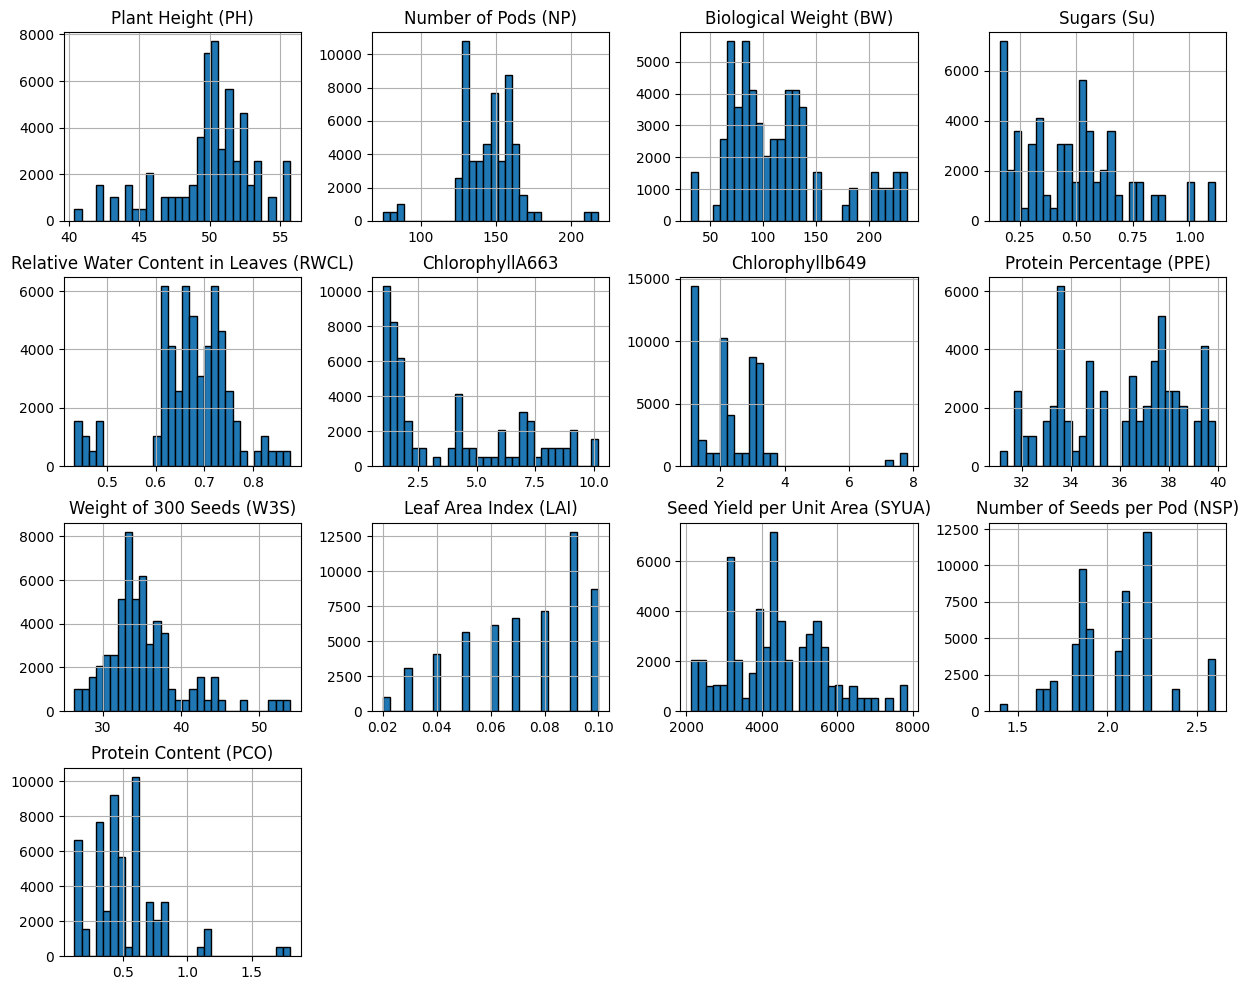

In [10]:
df.hist(figsize=(15, 12), bins=30, edgecolor="black")
plt.show()

## Análisis Bivariado

Relación entre altura de la planta y número de vainas.

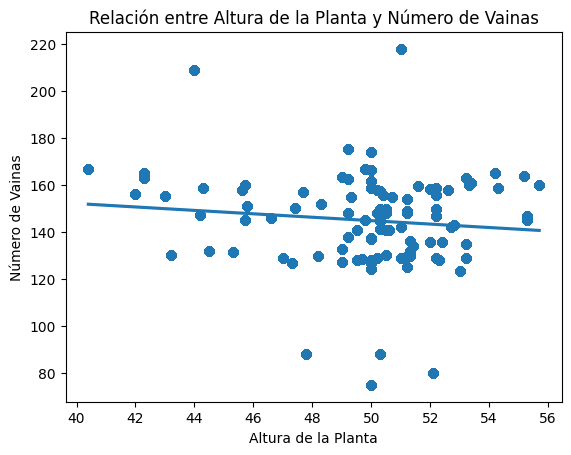

In [11]:
sns.regplot(x='Plant Height (PH)', y='Number of Pods (NP)', data=df)
plt.title("Relación entre Altura de la Planta y Número de Vainas")
plt.xlabel("Altura de la Planta")
plt.ylabel("Número de Vainas")
plt.show()


Se observa una tendencia negativa entre número de vainas y altura de la planta.

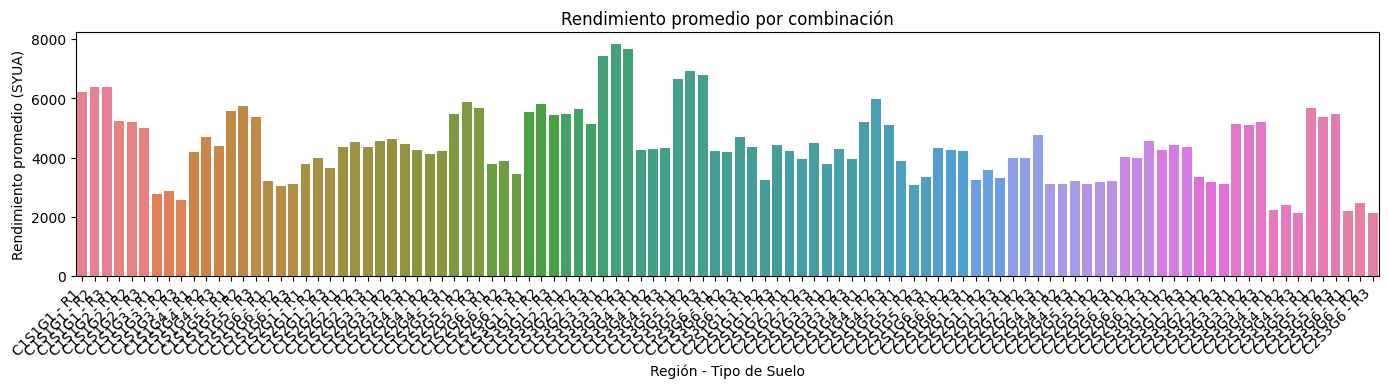

In [12]:
# Vamos a analizar rendimientos promedios agrupados por Región y Tipo de Suelo.
grouped = df.groupby(['Parameters', 'Random '])['Seed Yield per Unit Area (SYUA)'].mean().reset_index()


grouped['label'] = grouped['Parameters'] + ' - ' + grouped['Random ']


plt.figure(figsize=(14,6))
sns.barplot(data=grouped, x='label', y='Seed Yield per Unit Area (SYUA)', hue='Parameters')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Rendimiento promedio (SYUA)')
plt.xlabel('Región - Tipo de Suelo')
plt.title('Rendimiento promedio por combinación')
plt.tight_layout()
plt.legend().set_visible(False)
plt.show()


**ANALISIS MULTIVARIADO**

Pairplot para ver múltiples relaciones.

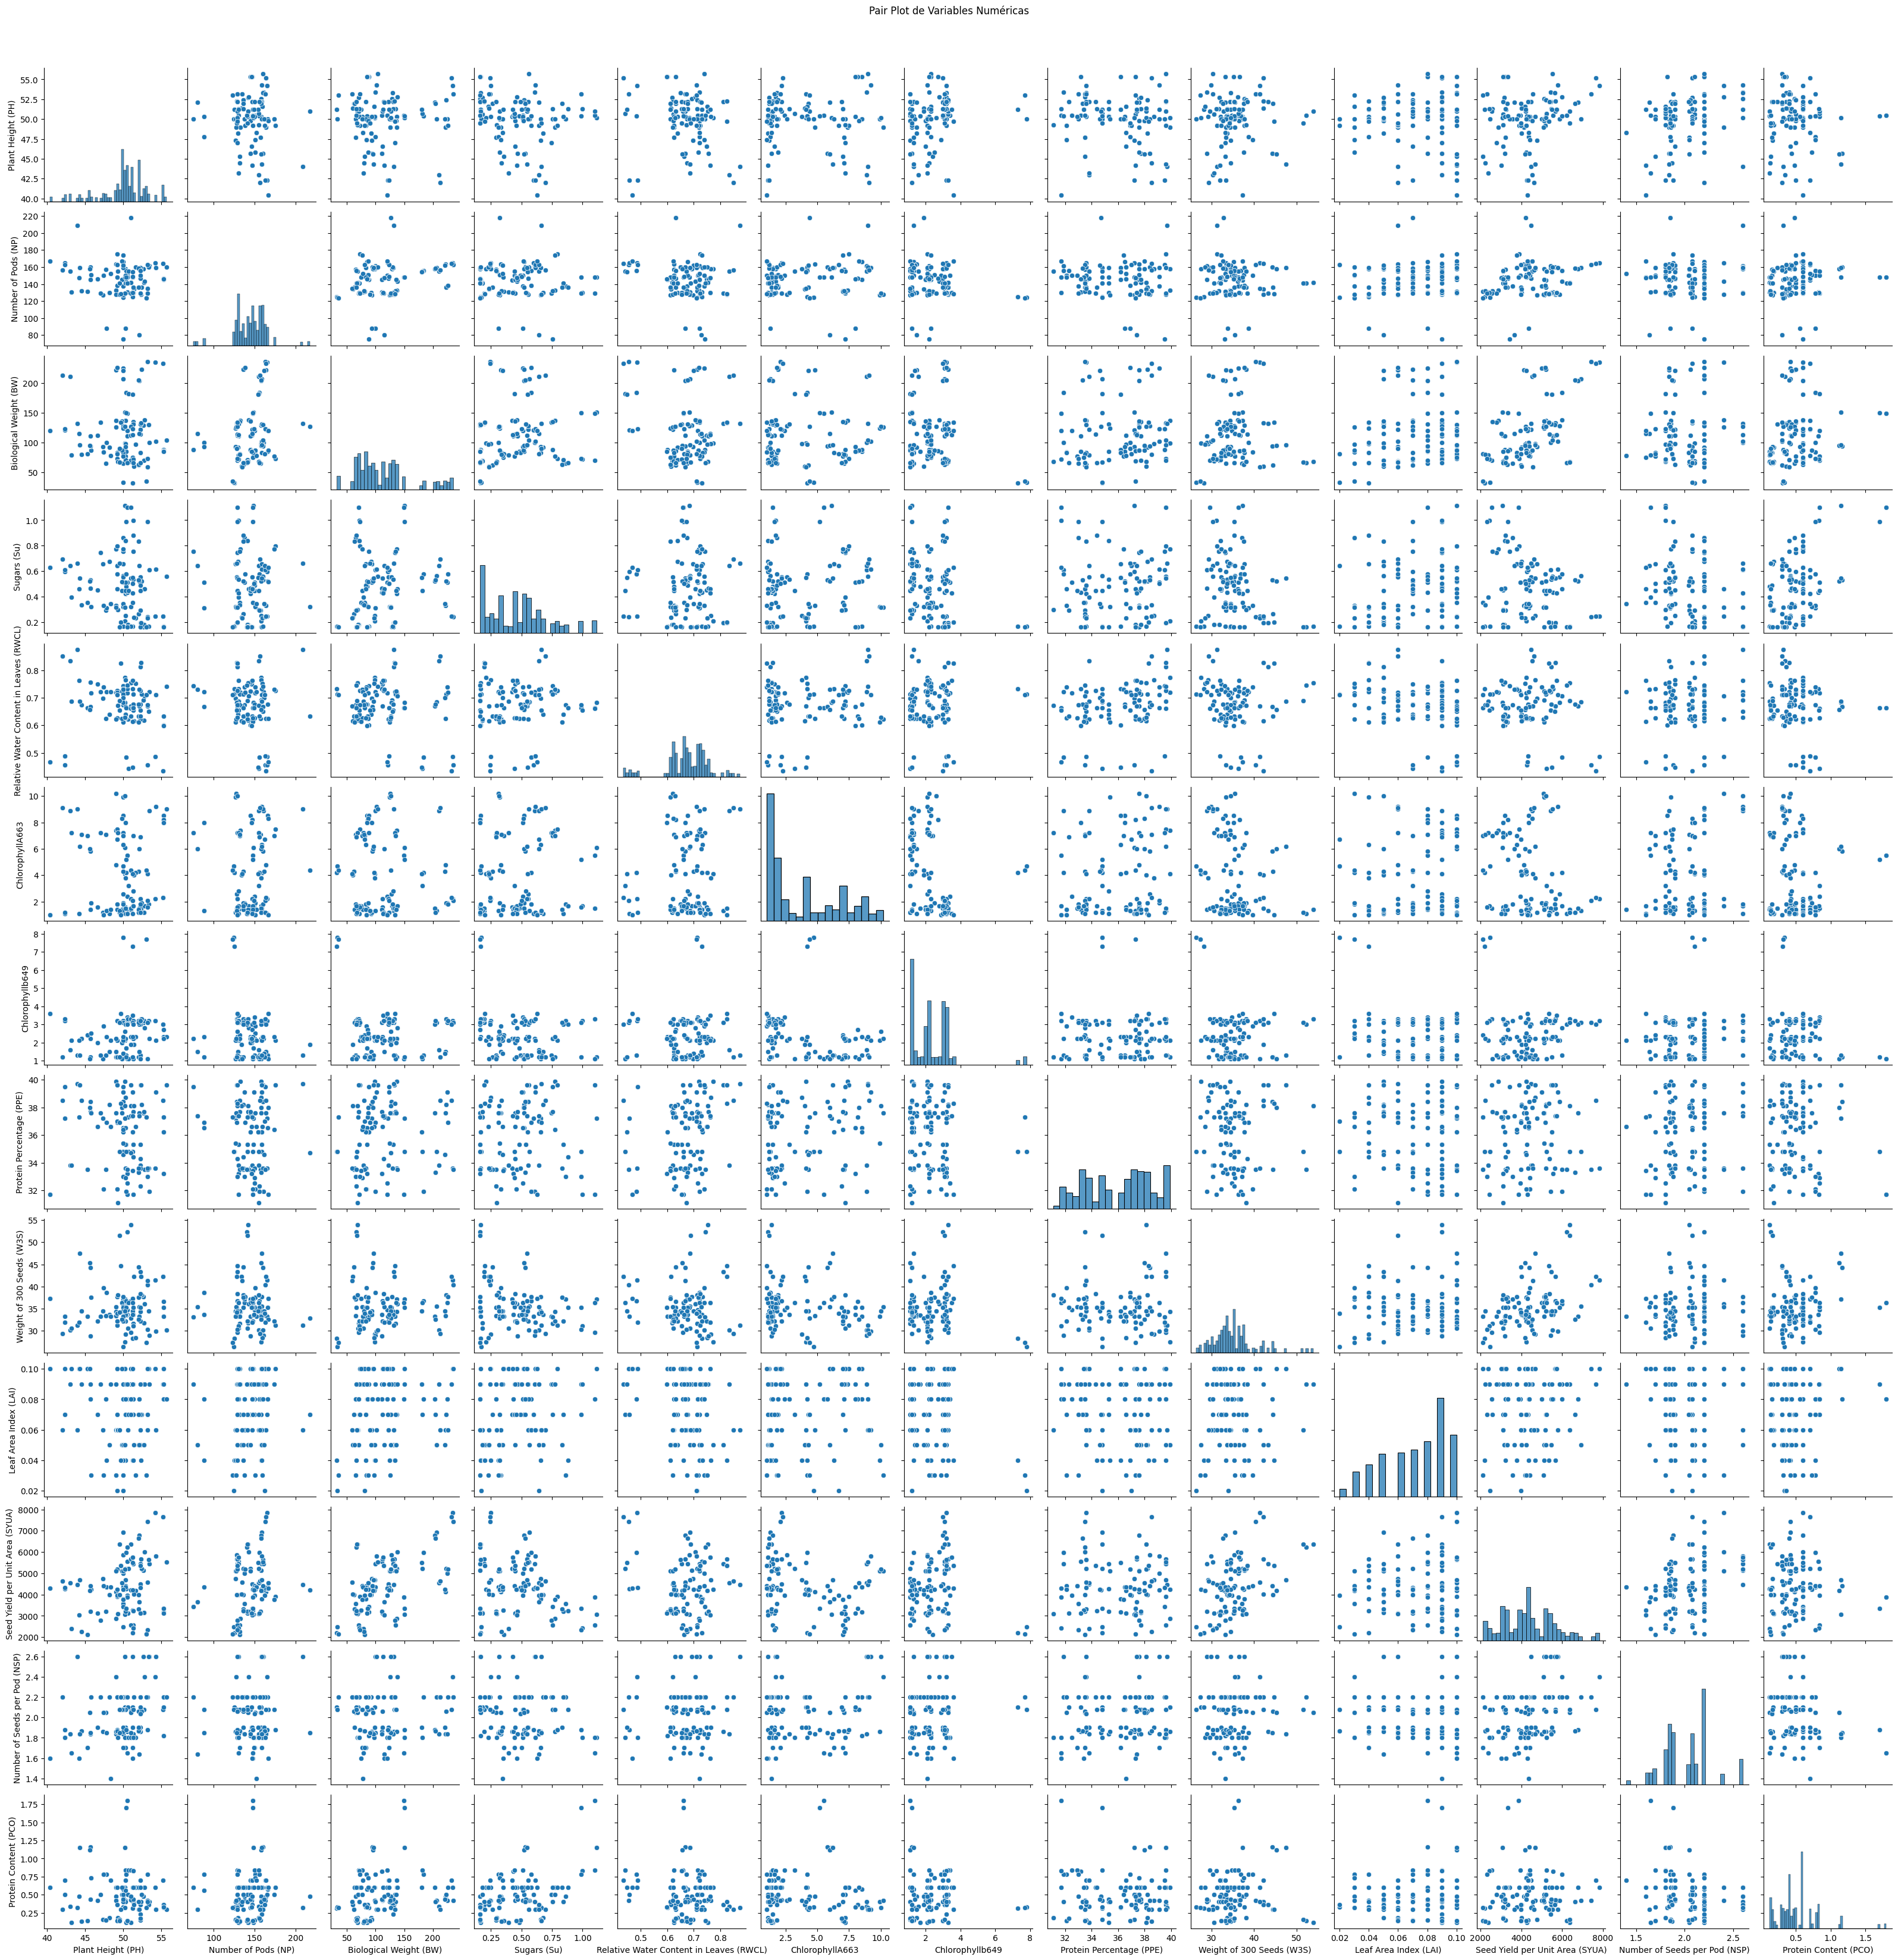

In [13]:
sns.pairplot(numeric_df.dropna().sample(frac=0.1))
plt.suptitle('Pair Plot de Variables Numéricas', y=1.02)
plt.show()

CREACION DE BOXPLOT PARA ANALISIS DE OUTLIERS

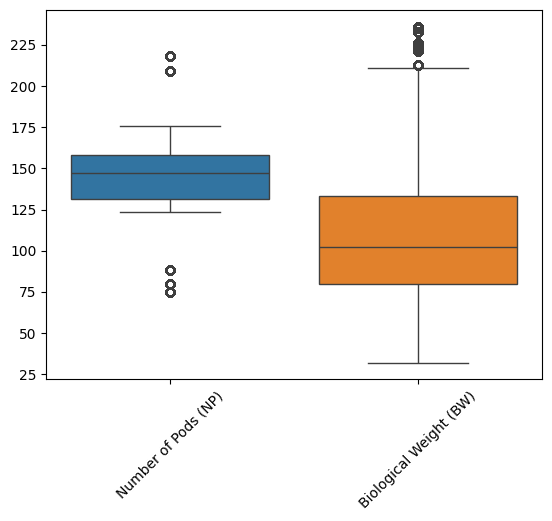

In [14]:
sns.boxplot(data=df[['Number of Pods (NP)', 'Biological Weight (BW)',]]) # Pass a list of column names to select multiple columns.
plt.xticks(rotation=45)
plt.show()


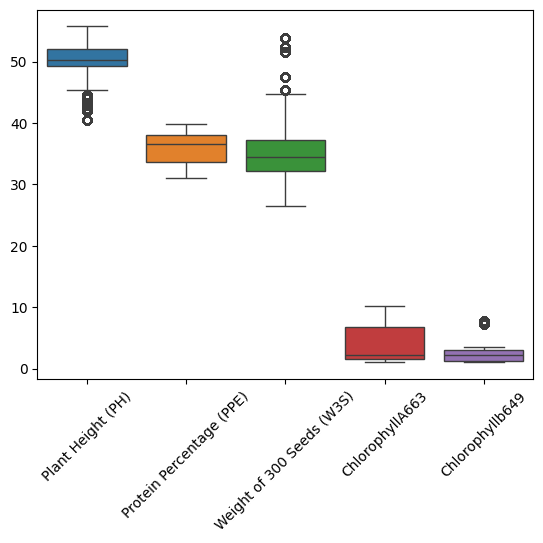

In [15]:
sns.boxplot(data=df[['Plant Height (PH)', 'Protein Percentage (PPE)', 'Weight of 300 Seeds (W3S)', 'ChlorophyllA663', 'Chlorophyllb649']]) # Pass a list of column names to select multiple columns.
plt.xticks(rotation=45)
plt.show()

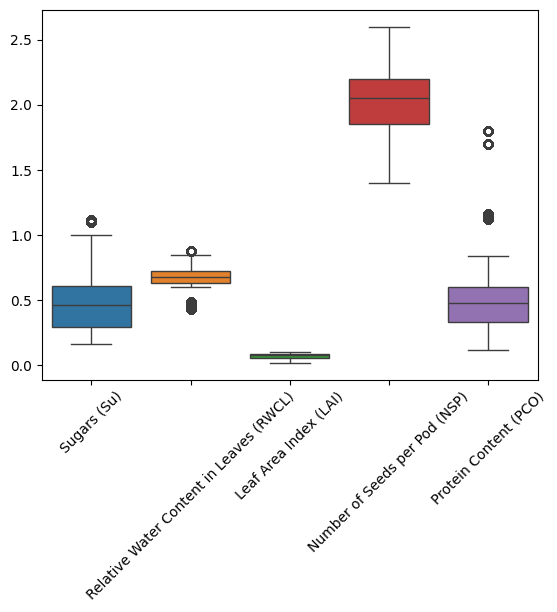

In [16]:
sns.boxplot(data=df[['Sugars (Su)', 'Relative Water Content in Leaves (RWCL)', 'Leaf Area Index (LAI)', 'Number of Seeds per Pod (NSP)', 'Protein Content (PCO)']]) # Pass a list of column names to select multiple columns.
plt.xticks(rotation=45)
plt.show()

**DETECCION DE OUTLIERS**

In [17]:
model_features = [col for col in numeric_df if col != "Seed Yield per Unit Area (SYUA)"]

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

outlier_model_df = pd.DataFrame(columns=['Variable', 'Outlier Percentage'])

for feature in model_features:
    outliers = detect_outliers_iqr(df, feature)
    outlier_percentage = (len(outliers) / len(df)) * 100
    outlier_model_df = pd.concat([outlier_model_df, pd.DataFrame([{'Variable': feature, 'Outlier Percentage': outlier_percentage}])], ignore_index=True)

print(outlier_model_df)

                                   Variable  Outlier Percentage
0                         Plant Height (PH)            9.258792
1                       Number of Pods (NP)            5.550947
2                    Biological Weight (BW)            8.333634
3                               Sugars (Su)            2.779080
4   Relative Water Content in Leaves (RWCL)            9.262399
5                           ChlorophyllA663            0.000000
6                           Chlorophyllb649            2.777277
7                  Protein Percentage (PPE)            0.000000
8                 Weight of 300 Seeds (W3S)            4.629396
9                     Leaf Area Index (LAI)            0.000000
10            Number of Seeds per Pod (NSP)            0.000000
11                    Protein Content (PCO)            5.556357


<ipython-input-17-03775f3cd205>:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  outlier_model_df = pd.concat([outlier_model_df, pd.DataFrame([{'Variable': feature, 'Outlier Percentage': outlier_percentage}])], ignore_index=True)


Grafica Columnas con outliers

<ipython-input-18-11205bc91efd>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=outlier_model_df, x='Variable', y='Outlier Percentage', palette='viridis')


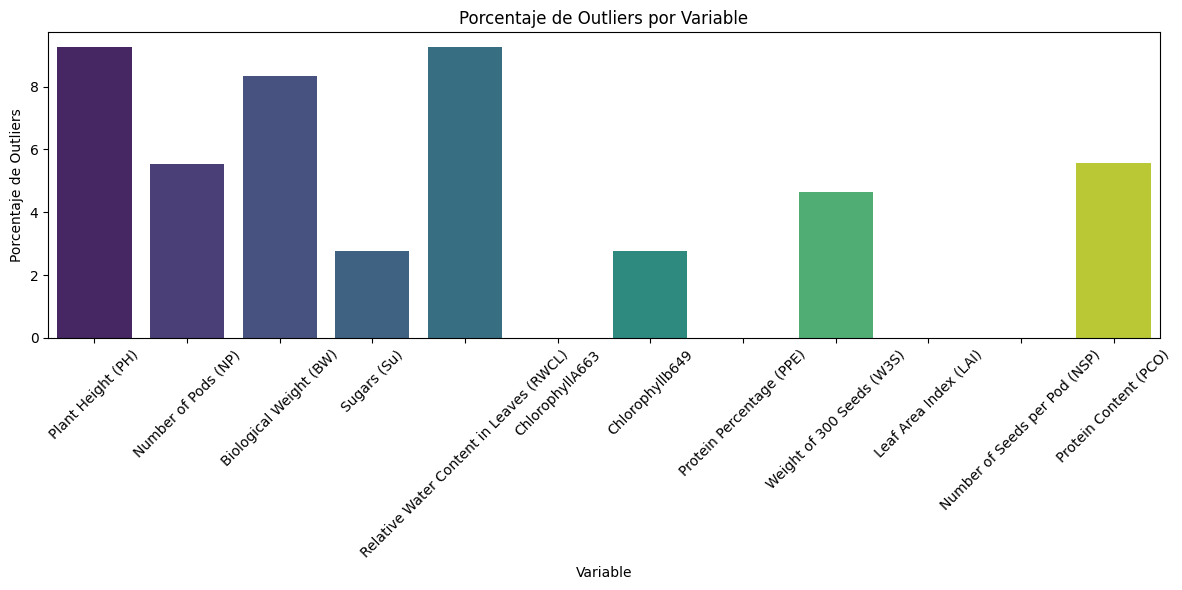

In [18]:
plt.figure(figsize=(12, 6))

sns.barplot(data=outlier_model_df, x='Variable', y='Outlier Percentage', palette='viridis')

plt.title('Porcentaje de Outliers por Variable')
plt.xlabel('Variable')
plt.ylabel('Porcentaje de Outliers')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

TRATAMIENTO DE OUTLIERS

Se decide mantener columnas con valores outliers, ya que varias de ellas contienen valores altos y la eliminación o modificación de los mismos puede acarrear un problema de sobreajuste.

*NORMALIZACION CON LABEL ENCODER*

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Parameters'] = le.fit_transform(df['Parameters'])
df['Random '] = le.fit_transform(df['Random '])

In [20]:
df.head()

,Parameters,Random,Plant Height (PH),Number of Pods (NP),Biological Weight (BW),Sugars (Su),Relative Water Content in Leaves (RWCL),ChlorophyllA663,Chlorophyllb649,Protein Percentage (PPE),Weight of 300 Seeds (W3S),Leaf Area Index (LAI),Seed Yield per Unit Area (SYUA),Number of Seeds per Pod (NSP),Protein Content (PCO)
0,4,0,50.5,130.3,111.0,0.433,0.732,1.4,3.1,33.2,33.6,0.08,5567.4,1.86,0.82
1,32,0,44.5,132.0,80.0,0.334,0.674,7.1,2.2,38.5,34.4,0.09,2245.5,1.87,0.13
2,23,0,52.2,150.0,83.0,0.490,0.677,1.8,1.3,33.6,35.2,0.07,4326.7,2.04,0.15
3,0,0,50.5,140.8,66.0,0.163,0.745,1.1,3.0,33.5,52.3,0.09,6214.5,2.20,0.14
4,11,1,49.2,175.6,73.0,0.795,0.725,7.5,2.1,39.6,31.2,0.10,3897.8,1.88,0.60


**MATRIZ DE CORRELACION**

In [21]:
correlacion = df.select_dtypes(include=np.number).corr()

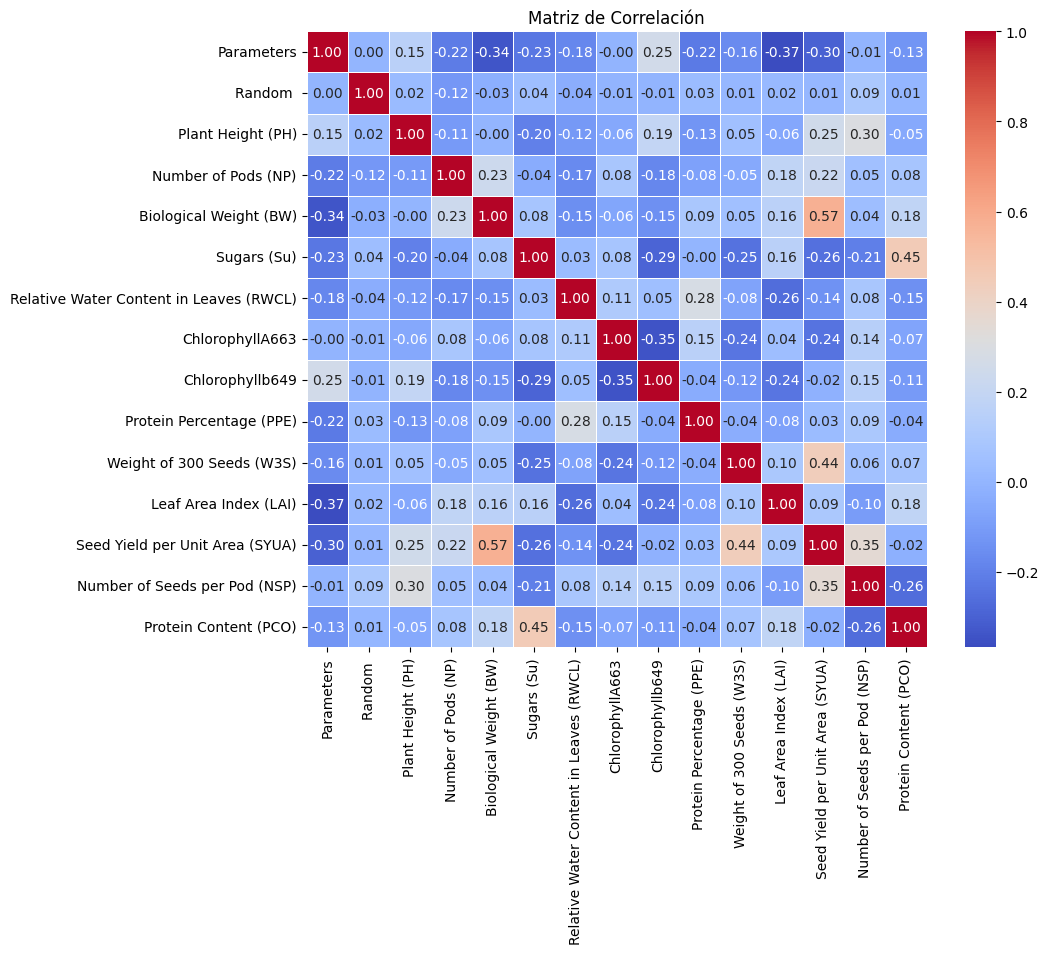

In [22]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Matriz de Correlación")
plt.show()

ANALISIS DE COMPONENTES PRINCIPALES

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
X = df[numeric_cols]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

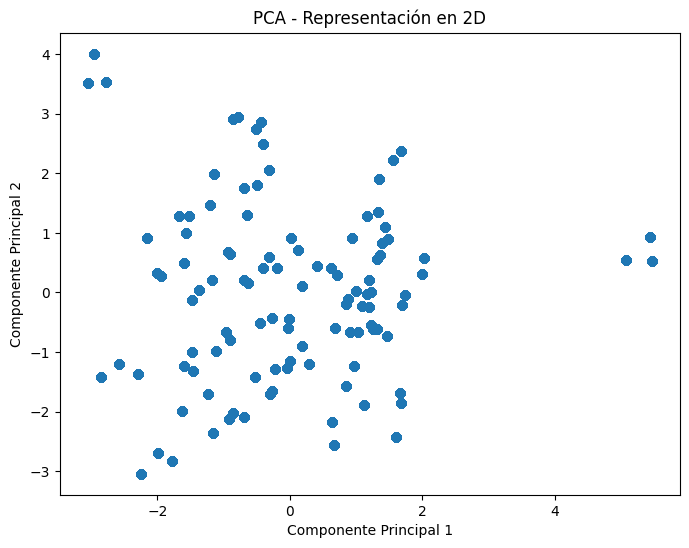

Varianza explicada por PC1: 0.16
Varianza explicada por PC2: 0.15


In [24]:
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Representación en 2D')
plt.show()

explained_variance = pca.explained_variance_ratio_
print(f"Varianza explicada por PC1: {explained_variance[0]:.2f}")
print(f"Varianza explicada por PC2: {explained_variance[1]:.2f}")

Los dos primeros componentes principales explican juntos aproximadamente 31% de la varianza total de los datos. Este resultado sugiere que los datos tienen una estructura compleja (alta dimensionalidad) o que no hay componentes dominantes claros.

#ENTRENAMIENTO Y TESTEO

**Modelo 1: Random Forest Regressor**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [26]:
X = df.drop(columns=['Seed Yield per Unit Area (SYUA)'])
y = df['Seed Yield per Unit Area (SYUA)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# ENTRENAR EL MODELO
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [28]:
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 8.391842414015119e-23
R² Score: 1.0


In [29]:
##Vamos a analizar si hay Sobreajuste
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

y_train_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("Entrenamiento:")
print("MSE:", mse_train)
print("R² Score:", r2_train)


Entrenamiento:
MSE: 8.465201083274126e-23
R² Score: 1.0


In [31]:
y_test_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Prueba:")
print("MSE:", mse_test)
print("R² Score:", r2_test)


Prueba:
MSE: 8.391842414015119e-23
R² Score: 1.0


El modelo parece estar teniendo un buen desempeño.

**Modelo 2: AdaBoost**

In [32]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error


In [33]:
X = df.drop(columns=['Seed Yield per Unit Area (SYUA)'])
y = df['Seed Yield per Unit Area (SYUA)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [34]:
model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

model.fit(X_train, y_train)


AdaBoostRegressor(learning_rate=0.1, n_estimators=100, random_state=42)

In [35]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=median_absolute_error(y_true=y_test, y_pred=y_pred)

print(f"MSE: {mse}")
print(f"R² Score: {r2}")
print('MAE: ',mae)


MSE: 251089.91270597343
R² Score: 0.8384456973302825
MAE:  438.7414484976807


**Modelo 3: GradientBoosting**

In [36]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error


In [37]:
X = df.drop(columns=['Seed Yield per Unit Area (SYUA)'])
y = df['Seed Yield per Unit Area (SYUA)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

model.fit(X_train, y_train)


GradientBoostingRegressor(random_state=42)

In [39]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=median_absolute_error(y_true=y_test, y_pred=y_pred)


print("MSE:", mse)
print("R² Score:", r2)
print('MAE: ',mae)


MSE: 5147.985193264074
R² Score: 0.9966877237357372
MAE:  44.16574965513337


**Modelo 4: LightGBM**

In [40]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [41]:
X = df.drop(columns=['Seed Yield per Unit Area (SYUA)'])
y = df['Seed Yield per Unit Area (SYUA)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
model = lgb.LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42)

model.fit(X_train, y_train)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006695 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 689
[LightGBM] [Info] Number of data points in the train set: 44360, number of used features: 14
[LightGBM] [Info] Start training from score 4387.666517


LGBMRegressor(random_state=42)

In [43]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=median_absolute_error(y_true=y_test, y_pred=y_pred)

print("MSE:", mse)
print("R² Score:", r2)
print('MAE: ',mae)


MSE: 0.014946723207565814
R² Score: 0.9999999903830966
MAE:  0.08802162668234814


**Modelo 5: XGBoost**

In [44]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
regressor = xgb.XGBRegressor(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3)

In [45]:
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [46]:
y_pred = regressor.predict(X_test)

In [47]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
r2=r2_score(y_true=y_test, y_pred=y_pred)
print('r2: ', r2)
mse=mean_squared_error(y_true=y_test, y_pred=y_pred)
print('MSE: ',mse)
mae=median_absolute_error(y_true=y_test, y_pred=y_pred)
print('MAE: ',mae)

r2:  0.9999779677323555
MSE:  34.24285251558396
MAE:  3.823339843750091


Conclusión: Los cinco modelos predicen resultados similares, demostrando un buen desempeño.

#OPTIMIZACION DE PARAMETROS CON GRIDSEARCH

**Para RandomForestRegressor**

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [49]:
modelo = RandomForestRegressor(random_state=42)

In [50]:
parametros = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

In [51]:
grid = GridSearchCV(estimator=modelo,
                    param_grid=parametros,
                    cv=5,
                    scoring='neg_mean_squared_error',
                    n_jobs=-1)


In [52]:
grid.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='neg_mean_squared_error')

In [53]:
print("Mejores parámetros encontrados:", grid.best_params_)
print("Mejor puntuación (MSE negativo):", grid.best_score_)


Mejores parámetros encontrados: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Mejor puntuación (MSE negativo): -3.815062900015197e-23


Comentarios: Un MSE negativo tan cercano a cero como -3.81e-23 indica que el modelo de Random Forest Regressor prácticamente no está cometiendo error en la validación cruzada de GridSearchCV, lo cual sugiere que el modelo está ajustando perfectamente los datos evaluados.

**Para LIGHTBM**

In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from lightgbm import LGBMRegressor


In [55]:
model = LGBMRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 50]
}


In [56]:
grid = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006595 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 689
[LightGBM] [Info] Number of data points in the train set: 44360, number of used features: 14
[LightGBM] [Info] Start training from score 4387.666517
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'num_leaves': [20, 31, 50]},
             scoring='neg_mean_squared_error', verbose=1)

In [57]:
best_model = grid.best_estimator_

print("Mejores parámetros encontrados:", grid.best_params_)

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R² Score: {r2}")


Mejores parámetros encontrados: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'num_leaves': 50}
MSE: 1.783497903170918e-08
MAE: 0.00010735084037469975
R² Score: 0.9999999999999886


Comentarios: Un MSE extremadamente bajo, un MAE mínimo y un R² prácticamente 1, indican que el modelo LGBMRegressor está haciendo predicciones casi perfectas. Eso puede significar una de dos cosas:
-El modelo es excelente y generaliza muy bien.
-El modelo está sobreajustado (por ejemplo, si hay data leakage o el test set no representa datos reales).

Conclusión: El modelo está haciendo muy buenas predicciones. Para evaluar posible sobreajuste, comprobamos que no haya variables que contengan información del futuro. Además, se controla que el escalado se realice siempre después de dividir el conjunto en entrenamiento y prueba para evitar la contaminación del test con información del train.
Todo parece estar correcto.